In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


# 1. Load Libraries

In [2]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
! pip install joblib

In [4]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
heading_1 = df[df["Score"]==1]["Summary"] # Extract only sumary of reviws
collapsed_heading_1 = heading_1.str.cat(sep=' ')

heading_2 = df[df["Score"]==2]["Summary"] # Extract only sumary of reviws
collapsed_heading_2 = heading_2.str.cat(sep=' ')

heading_3 = df[df["Score"]==3]["Summary"] # Extract only sumary of reviws
collapsed_heading_3 = heading_3.str.cat(sep=' ')

heading_4 = df[df["Score"]==4]["Summary"] # Extract only sumary of reviws
collapsed_heading_4 = heading_4.str.cat(sep=' ')

heading_5 = df[df["Score"]==5]["Summary"] # Extract only sumary of reviws
collapsed_heading_5 = heading_4.str.cat(sep=' ')


Word Cloud for Sports


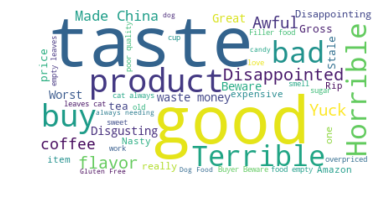


Word Cloud for Business


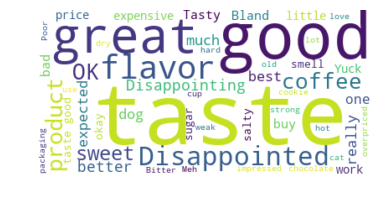


Word Cloud for Politics


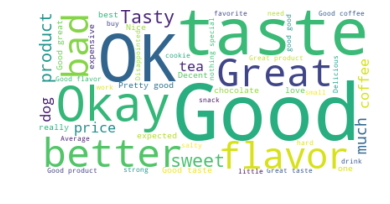


Word Cloud for Technology


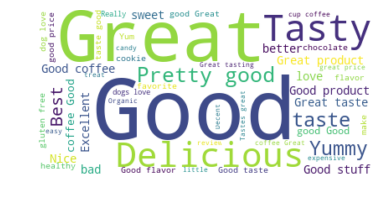


Word Cloud for Entertainment


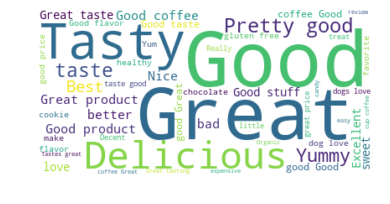

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

print("Word Cloud for Sports")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Business")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_2)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Politics")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_3)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Technology")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_4)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
     
print("\nWord Cloud for Entertainment")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_5)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Building Pipeline

In [8]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [9]:
df_1 = df.dropna()
df_1.shape, df.shape

((568411, 10), (568454, 10))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_1["Summary"], df_1["Score"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((454728,), (113683,), (454728,))

# Train the mode

In [11]:
model = clf.fit(X_train,y_train)

In [12]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.7025764626197408


In [13]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([4, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [14]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 5058,   111,   185,   217,  4811],
       [ 1306,   342,   457,   230,  3658],
       [  705,   114,  1298,   601,  5578],
       [  333,    13,   246,  1496, 14176],
       [  465,    26,   121,   459, 71677]])

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 5058   111   185   217  4811]
 [ 1306   342   457   230  3658]
 [  705   114  1298   601  5578]
 [  333    13   246  1496 14176]
 [  465    26   121   459 71677]]
Normalized confusion matrix
[[4.87e-01 1.07e-02 1.78e-02 2.09e-02 4.63e-01]
 [2.18e-01 5.71e-02 7.63e-02 3.84e-02 6.10e-01]
 [8.50e-02 1.37e-02 1.56e-01 7.24e-02 6.72e-01]
 [2.05e-02 7.99e-04 1.51e-02 9.20e-02 8.72e-01]
 [6.39e-03 3.57e-04 1.66e-03 6.31e-03 9.85e-01]]


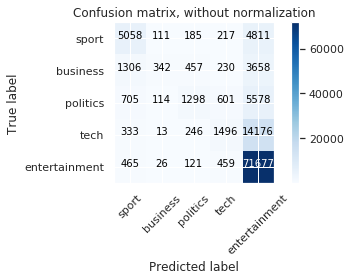

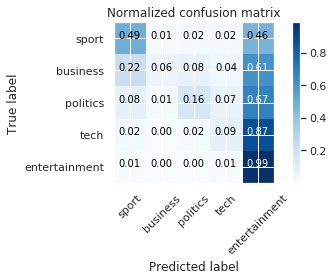

In [16]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sport','business','politics','tech','entertainment'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['sport','business','politics','tech','entertainment'], normalize=True,title='Normalized confusion matrix')

plt.show()

In [17]:
df_1.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [18]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_1["Summary"], df_1["Score"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((454728,), (113683,), (454728,))

In [20]:
model = clf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.7645910118487372


Confusion matrix, without normalization
[[ 5058   111   185   217  4811]
 [ 1306   342   457   230  3658]
 [  705   114  1298   601  5578]
 [  333    13   246  1496 14176]
 [  465    26   121   459 71677]]
Normalized confusion matrix
[[4.87e-01 1.07e-02 1.78e-02 2.09e-02 4.63e-01]
 [2.18e-01 5.71e-02 7.63e-02 3.84e-02 6.10e-01]
 [8.50e-02 1.37e-02 1.56e-01 7.24e-02 6.72e-01]
 [2.05e-02 7.99e-04 1.51e-02 9.20e-02 8.72e-01]
 [6.39e-03 3.57e-04 1.66e-03 6.31e-03 9.85e-01]]


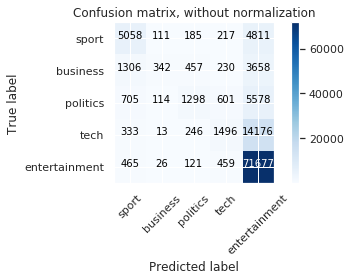

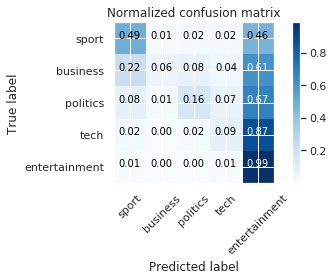

In [22]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sport','business','politics','tech','entertainment'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['sport','business','politics','tech','entertainment'], normalize=True,title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[ 6965   621   419   255  2122]
 [ 1261  2197   660   246  1629]
 [  757   521  3717   712  2589]
 [  416   254   702  5979  8913]
 [ 1028   458   749  2450 68063]]
Normalized confusion matrix
[[0.67 0.06 0.04 0.02 0.2 ]
 [0.21 0.37 0.11 0.04 0.27]
 [0.09 0.06 0.45 0.09 0.31]
 [0.03 0.02 0.04 0.37 0.55]
 [0.01 0.01 0.01 0.03 0.94]]


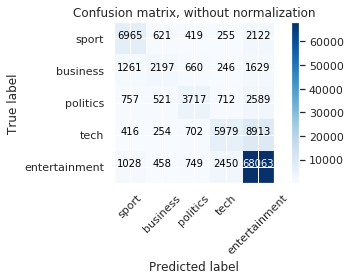

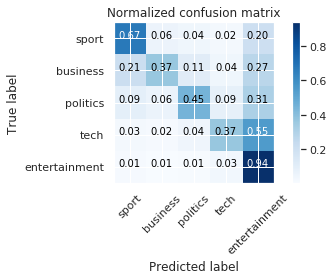

In [23]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sport','business','politics','tech','entertainment'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['sport','business','politics','tech','entertainment'], normalize=True,title='Normalized confusion matrix')

plt.show()